# Procesamiento de imágenes #02
### Lectura, visualización y escritura de imágenes en Python

Dra. C. Miriela Escobedo Nicot

### Preparando el entorno de trabajo

#### Software requerido

- Python 3

Con las siguientes bibliotecas:

- `pylab`
- `numpy`
- `scipy`
- `matplotlib`
- `scikit-image`

Para facilitar el proceso de instalación se recomienda instalar [Anaconda](https://www.anaconda.com/distribution/) para **Python 3**, que es una distribución de Python que incluye todas las bibliotecas necesarias para trabajar en este curso. Se recomienda utilizar <b>Jupyter Notebook</b> para la codificación para mayor comodidad.

<b>En todo código del curso se utilizará inicialmente la sentencia:</b>

In [1]:
from pylab import *

Para importar las funciones iniciales necesarias para trabajar con imágenes.

### Lectura de imagenes

Las imagenes son leídas utilizando la función `imread` a la cuál se le pasa como parámetro la ruta donde se encuentra la imágen y nos devuelve la matriz correspondiente, la cuál podemos almacenar en una variable para posteriormente realizar el procesamient y/o visualización.

In [2]:
A = imread('dataset/flores.tif')

En la línea anterior hemos cargado la imagen que se encuentra dentro de la carpeta `dataset` con el nombre `flores.tif`y hemos almacenado su matriz correspondiente en la variable `A`. 

Podemos imprimir el contenido de `A`y notar que la variable efectivamente contiene la matriz correspondiente a la imagen que hemos cargado.

In [3]:
A

array([[[ 57,  63,  27],
        [ 64,  65,  31],
        [ 66,  68,  31],
        ...,
        [104, 123,  67],
        [103, 123,  64],
        [101, 119,  67]],

       [[ 63,  65,  41],
        [ 68,  64,  35],
        [ 76,  70,  38],
        ...,
        [103, 120,  65],
        [106, 121,  64],
        [107, 121,  68]],

       [[ 60,  65,  33],
        [ 66,  72,  38],
        [ 58,  63,  31],
        ...,
        [103, 121,  71],
        [108, 122,  71],
        [111, 125,  72]],

       ...,

       [[149, 121, 231],
        [148, 120, 231],
        [152, 126, 236],
        ...,
        [ 57,  68,  38],
        [ 60,  68,  47],
        [ 61,  63,  50]],

       [[145, 115, 227],
        [149, 121, 232],
        [148, 120, 231],
        ...,
        [ 53,  67,  41],
        [ 57,  69,  49],
        [ 62,  69,  53]],

       [[150, 121, 231],
        [149, 121, 231],
        [147, 121, 231],
        ...,
        [ 58,  69,  53],
        [ 61,  71,  60],
        [ 59,  70,  56]]

Para conocer con que tipo de imagen estamos tratando contamos con las propiedades `shape` y `dtype`, para conocer las dimensiones de la imágen y el tipo de valores numéricos que almacena:

In [4]:
A.shape

(600, 600, 3)

En este caso estamos tratando con una imágen a color (porque la útlima dimensión es 3 correspondiente a los valores de RGB) , y que tiene una resolución de 600 x 600 pixeles.

In [5]:
A.dtype

dtype('uint8')

Y podemos ver que el tipo de dato utilizado son enteros sin signo de 8 bits

### Visualización de imágenes

Las imágenes se muestran utilizando la función `imshow`, a la cual pasamos como parámetro la variable que contiene la matriz correspondiente a la imagen que queremos visualizar.

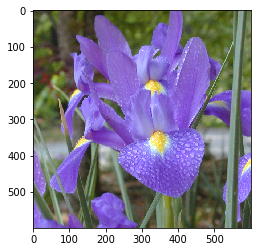

In [6]:
imshow(A)

### Extracción de componentes de una imagen en color

Recordemos que la variable A almacena la matriz de la imagen en color, podemos extraer cada componente RGB como una matriz independiente utilizando los indices de la matriz. Debemos tener en cuenta que en Python los indices de los arreglos y matrices van de $0$ a $n$, tomando como $n$ el tamaño.

In [7]:
R = A[:,:,0] # Extraer la primera componente Red
G = A[:,:,1] # Extrer la segunda componente Green
B = A[:,:,2] # Extrer la tercera componente Blue

Y podemos visualizar cada componente de manera independiente utilizando `imshow`, en este caso cada matriz extraída por cada componente tiene una dimensión de (600, 600, 1) por lo que para visualizarla correctamente es preferible utilizar un mapa de color en escala de grises, esto se hace configurando el parámetro `cmap` de la función `imshow` y otorgándole el valor <b>"gray"</b>

In [8]:
R.shape # Mostrar dimensión de de las componentes extraídas (600, 600)

(600, 600)

In [9]:
R # Mostrar que la componente también es una matriz

array([[ 57,  64,  66, ..., 104, 103, 101],
       [ 63,  68,  76, ..., 103, 106, 107],
       [ 60,  66,  58, ..., 103, 108, 111],
       ...,
       [149, 148, 152, ...,  57,  60,  61],
       [145, 149, 148, ...,  53,  57,  62],
       [150, 149, 147, ...,  58,  61,  59]], dtype=uint8)

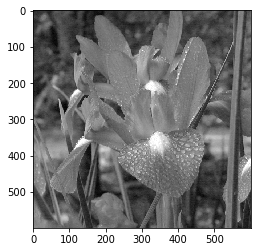

In [10]:
## Visualizar componentes en escala de grises

imshow(R, cmap="gray")

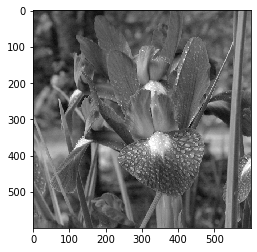

In [11]:
imshow(G, cmap="gray")

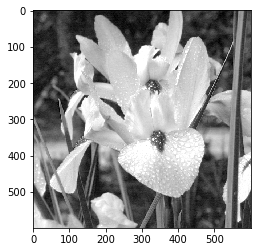

In [12]:
imshow(B, cmap="gray")

En ocasiones resulta más cómodo poder visalizar varias imágenes a la vez.
Para esto podemos utilizas la función `subplots` a la cual pasamos como parámetros la cantidad de filas y columnas que utilizaremos para organizar nuestras imágenes, y las dimensiones de cada una de ellas. Esta función nos devuelve dos parametros, el primero de ellos lo descartaremos utilizando `_`, y el segundo es una matriz donde cada elemento le corresponde a un lienzo que utilizaremos para llamar a la función `imshow` y mostrar la imagen que deseemos.

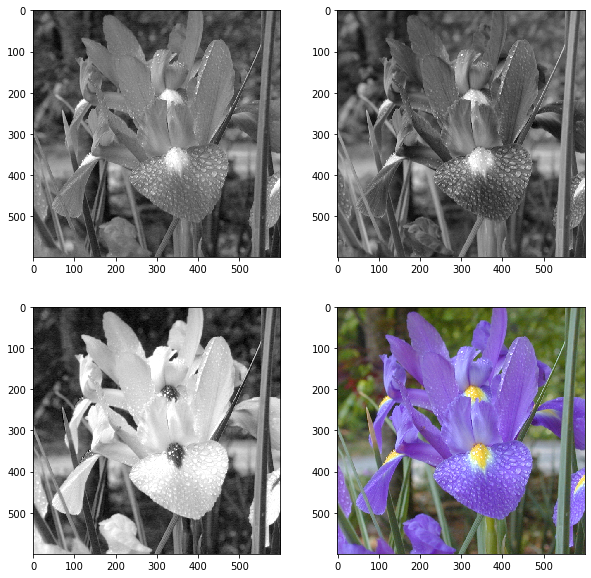

In [13]:
_, ((ax0, ax1), (ax2, ax3)) = subplots(2, 2, figsize=(10, 10))

ax0.imshow(R, cmap="gray")
ax1.imshow(G, cmap="gray")
ax2.imshow(B, cmap="gray")
ax3.imshow(A)

En el siguiente ejemplo vemos como se muestran las componentes RGB sin utilizar el mapa de color a escala de grises.

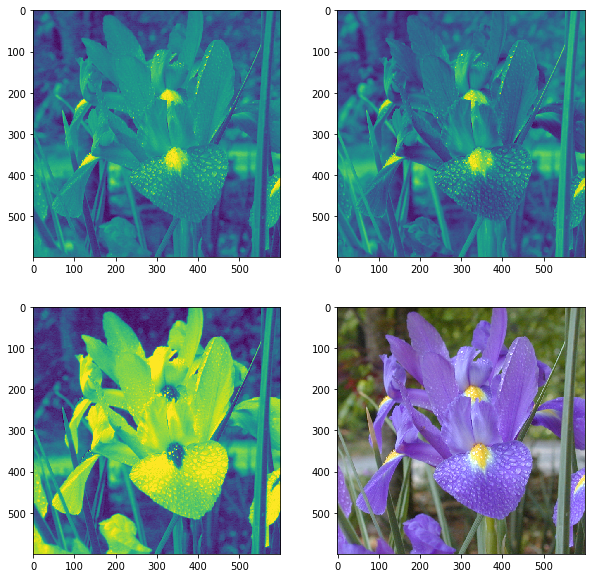

In [14]:
_, ((ax0, ax1), (ax2, ax3)) = subplots(2, 2, figsize=(10, 10))

ax0.imshow(R)
ax1.imshow(G)
ax2.imshow(B)
ax3.imshow(A)

Ahora supongamos que queremos observar cada imagen de cada componente RGB pero con su color correspondiente.

Intutivamente lo que se nos ocurre es conservar los valores de la imagen en la componente que deseamos visualizar y el resto ponerlos a cero.

Comencemos por crear una matriz con las mismas dimensiones de $A$, que es donde almacenamos nuestra imagen original pero con todos sus valores a $0$ esto se puede lograr facilmente utilizando la función `zeros_like` de la siguiente manera.

In [15]:
T = zeros_like(A)

Ahora tenemos en $T$ una matriz con las mismas dimensiones de $A$ pero con todos sus valores a $0$

In [16]:
T.shape

(600, 600, 3)

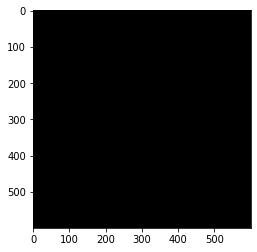

In [17]:
imshow(T) # Todos los valore estan a cero

Solo nos resta copiar cada componente en su lugar correspondiente e ir almacenando el valor resultante para mostrarlo luego.

In [18]:
T[:,:,0] = R # Asiganmos el valor de la componete R en s lugar correspondiente
RR = T # Guardamos el resultado

Volvemos a crear otra matriz para el resto de las componentes y repetimos el procedimiento

In [19]:
T = zeros_like(A)
T[:,:,1] = G
GG = T

In [20]:
T = zeros_like(A)
T[:,:,2] = B
BB = T

Ahora tenemos tres matrices $RR, GG, BB$ con los valores de cada componente de la imagen original $A$ en su lugar correspondiente y podemos proceder a visualizar el resultado.

In [21]:
# Obtener imagen original a partir de las componentes por separado

original = zeros_like(A)

original[:,:,0] = R
original[:,:,1] = G
original[:,:,2] = B

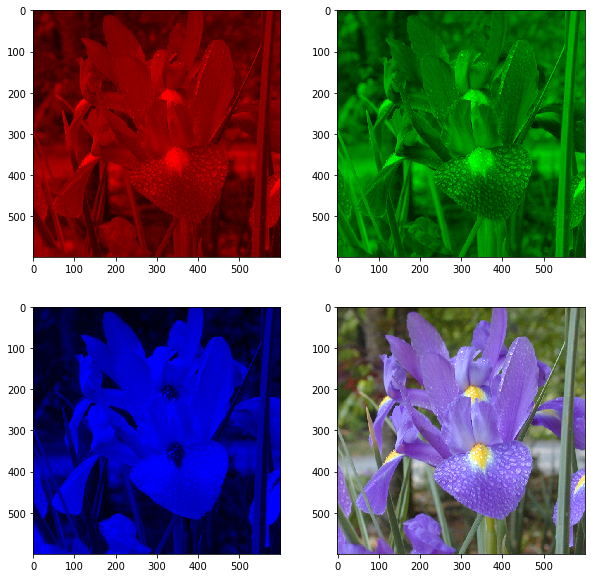

In [22]:
_, ((ax0, ax1), (ax2, ax3)) = subplots(2, 2, figsize=(10, 10))

ax0.imshow(RR)
ax1.imshow(GG)
ax2.imshow(BB)
ax3.imshow(original)

Y así obtenemos los tres canales de la imagen por separado y visualizados a color. Como podemos ver la imagen original es el resultado de la combinación de todas las componentes.

### Convertir una imagen a color en escala de grises (rgb2gray)

En este caso tendremos que importar la función `rgb2gray` que tenemos disponible en la biblioteca `skimage`

In [24]:
from skimage.color import rgb2gray

Y llamar a la función pasandole como parámetro la matriz de nuestra imagen y almacenar el valor en una nueva variable.

In [25]:
AG = rgb2gray(A)

In [31]:
AG.shape # Se observa que ahora tiene un solo canal

(600, 600)

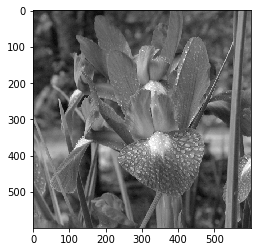

In [32]:
imshow(AG, cmap="gray") # Visualización de la imagen

### Escritura de imágenes

Una vez tenemos nuestra imagen como resultado de alguna operación que hemos realizado sobre la imágen original, nos puede interesar guardarla en disco. Para ello utilizamos la función `imwrite`, a la cuál pasamos como parámetros la matriz de la imagen que deseamos guardar y la ruta para el fichero, es importante colocar en el nombre del fichero la extensión que representa el formato en el que queremos guardar nuestra imagen.

Supongamos que hemos realizado la siguiente operación de eliminar el canal G de nuestra imagen original y queremos guardar el resultado en una imagen con formato JPG.

In [57]:
T = zeros_like(A)

T[:,:,0] = R
T[:,:,2] = B

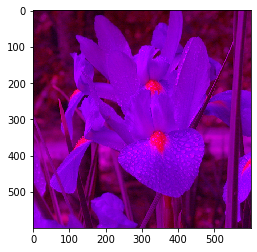

In [58]:
imshow(T)

In [59]:
### Guardar el resultado

imsave("dataset/outputs/flores_sin_g.jpg", T)

Para guardar imágenes en escala de grises solo hay que especificar al igual que con imshow el mapa de color a utilizar.

In [62]:
### Guardar imagen en escala de grises
imsave("dataset/outputs/flores_gray.png", AG, cmap="gray")

En este caso hemos utilizado el formato PNG